# Training MNIST with ordered and randomized order of pixels to a neural net

The set contains 42.000 handwritten digits. The pictures cover 28x28 pixel and are stored in a 784 separate columns.

In [29]:
# Import in order of usage
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense

import csv



# Function to shuffle the columns of the DataFrame (shuffle the pixels order)
def shuffleDataFrame(df, shuffle=False):
    '''
    Input: 
    df = pd.DataFrame
    shuffle = Boolean
    
    Output:
    df with shuffled (True) or unshuffled (False) column-order    
    '''
    if shuffle:
        col = df.columns.tolist()
        random.shuffle(col)
        return df[col]
    else: return df


    
def preprocessingData(shuffle = False):
    '''
    Input:
    shuffle = Boolean
    
    Decide whether the the column-order should be shuffled for further analysis
    '''
    # Loading all data in a single DataFrame
    df = pd.read_csv('mnist.csv')
    
    # Decide whether the columns should be shuffled
    df = shuffleDataFrame(df, shuffle)

    # Splitting all data into training- and testing-set
    df_train ,df_test = train_test_split(df, test_size=0.3)

    # Preprocessing the data to fit into the neuronal net
    X_train = df_train.drop(['label'], axis=1).values
    y_train = np_utils.to_categorical(df_train['label'].values, 10)

    X_test = df_test.drop(['label'], axis=1).values
    y_test = np_utils.to_categorical(df_test['label'].values, 10)
    y_test_class = df_test['label'].values

    # Checking the different shapes
    print('Shape Training-Data', X_train.shape)
    print('Shape Training-Label', y_train.shape)
    print('Shape Testing-Data', X_test.shape)
    print('Shape Training-Label', y_test.shape)
    
    return (X_train, y_train, X_test, y_test, y_test_class, df_train, df_test)
    
    
    
def printInputvector():
    '''
    The pixels are in a series, so a simple np.reshape([28,28]) will reset it to the original image. 
    '''
    # Visualizing the input vector. The vector has been reshaped for visual purposes.
    fig = plt.figure(figsize=(12, 10))

    for i in range(16):
        picture = X_train[i].reshape([28,28])
        plt.subplot(4, 4, i+1).imshow(picture, cmap='gray', interpolation='none')
        plt.title("Class {}".format(df_train['label'].values[i]))
        plt.axis('off')

    plt.suptitle('Image examples of the input-vector with their target class label')
    plt.show()
    
    
    
def fitModel():
    '''
    The neural net will have 3 hidden layers with 300 nodes each.
    It will have 784 input values and every node will be connected to every node of the previous and following layer.
    '''
    # Create the model: model
    model = Sequential()

    # Add the first hidden layer
    model.add(Dense(300, activation='relu', input_shape=(784,)))

    # Add the second hidden layer
    model.add(Dense(300, activation='relu'))

    # Add the third hidden layer
    model.add(Dense(300, activation='relu'))

    # Add the output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train/255, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

    # Test the model explicit with the test data
    score = model.evaluate(X_test, y_test, verbose=0)
    print('\nTest score:', score[0])
    print('Test accuracy:', score[1])
    
    
    
def saveAccuracy():
    # Saving the score and accuracy to a csv-file
    if shuffle:
        file_name = 'unshuffled.csv'
    else:
        file_name = 'shuffled.csv'

    with open(file_name, 'a', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow([score[0], score[1]])  
        
        
        
def printResult():
    # Predicting the classes of the testing-set
    predicted_classes = model.predict_classes(X_test)

    # Check which items we got right / wrong
    correct_indices = np.nonzero(predicted_classes == y_test_class)[0]
    incorrect_indices = np.nonzero(predicted_classes != y_test_class)[0]

    # Visualizing some testing-data. Correctly and incorrectly predicted classes are contained.

    plt.figure(figsize=[9,9])
    for i, correct in enumerate(correct_indices[:9]):
        plt.subplot(3,3,i+1)
        plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test_class[correct]))
        plt.axis('off')
        plt.suptitle('Image examples of correct predictions')
    plt.show()
    
    plt.figure(figsize=[9,9])
    for i, incorrect in enumerate(incorrect_indices[:9]):
        plt.subplot(3,3,i+1)
        plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test_class[incorrect]))
        plt.axis('off')
        plt.suptitle('Image examples of incorrect predictions')
    plt.show()

# Computation with unshuffled input vector

In [30]:
shuffle = False
X_train, y_train, X_test, y_test, y_test_class, df_train, df_test = preprocessingData(shuffle = shuffle)

Shape Training-Data (29400, 784)
Shape Training-Label (29400, 10)
Shape Testing-Data (12600, 784)
Shape Training-Label (12600, 10)


The pixels are in a series, so a simple np.reshape([28,28]) will reset it to the original image.

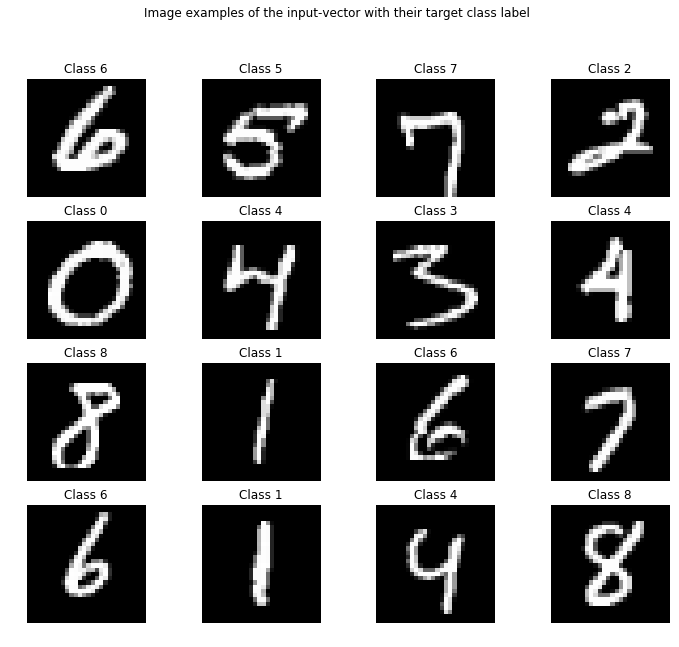

In [31]:
printInputvector()

The neural net will have 3 hidden layers with 300 nodes each. It will have 784 input values and every node will be connected to every node of the previous and following layer.

In [32]:
fitModel()

Train on 20580 samples, validate on 8820 samples
Epoch 1/10
20580/20580 [==============================] - 9s - loss: 0.4101 - acc: 0.8798 - val_loss: 0.1930 - val_acc: 0.9402
Epoch 2/10
20580/20580 [==============================] - 8s - loss: 0.1525 - acc: 0.9529 - val_loss: 0.1425 - val_acc: 0.9567
Epoch 3/10
20580/20580 [==============================] - 7s - loss: 0.0964 - acc: 0.9695 - val_loss: 0.1228 - val_acc: 0.9628
Epoch 4/10
20580/20580 [==============================] - 8s - loss: 0.0663 - acc: 0.9793 - val_loss: 0.1159 - val_acc: 0.9664
Epoch 5/10
20580/20580 [==============================] - 7s - loss: 0.0455 - acc: 0.9850 - val_loss: 0.1223 - val_acc: 0.9627
Epoch 6/10
20580/20580 [==============================] - 8s - loss: 0.0313 - acc: 0.9899 - val_loss: 0.1021 - val_acc: 0.9718
Epoch 7/10
20580/20580 [==============================] - 8s - loss: 0.0208 - acc: 0.9936 - val_loss: 0.1295 - val_acc: 0.9639
Epoch 8/10
20580/20580 [==============================] - 8s -

In [33]:
#saveAccuracy()

12352/12600 [============================>.] - ETA: 0s

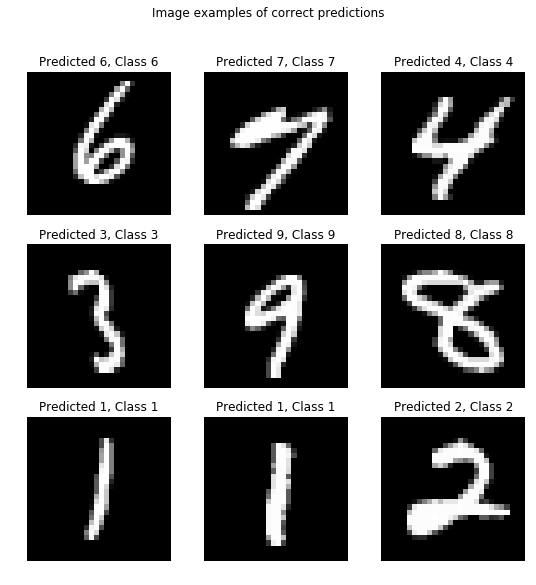

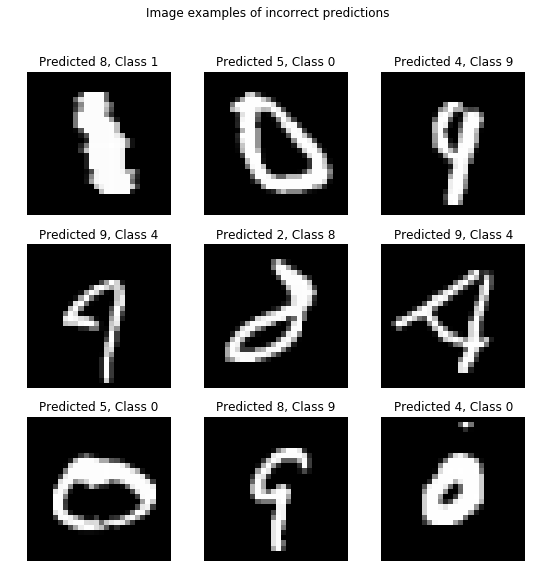

In [34]:
printResult()

# Computation with shuffled input vector

In [35]:
shuffle = True
X_train, y_train, X_test, y_test, y_test_class, df_train, df_test = preprocessingData(shuffle = shuffle)

Shape Training-Data (29400, 784)
Shape Training-Label (29400, 10)
Shape Testing-Data (12600, 784)
Shape Training-Label (12600, 10)


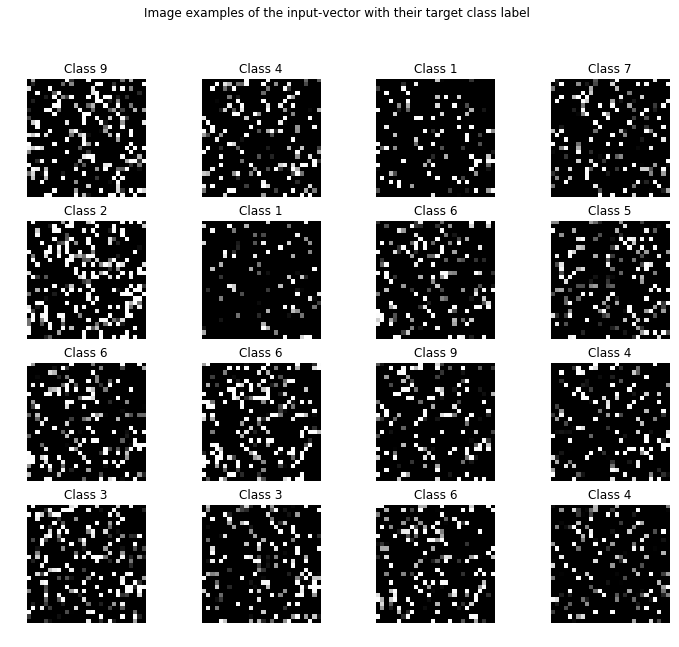

In [36]:
printInputvector()

In [37]:
fitModel()

Train on 20580 samples, validate on 8820 samples
Epoch 1/10
20580/20580 [==============================] - 8s - loss: 0.4091 - acc: 0.8812 - val_loss: 0.1972 - val_acc: 0.9397
Epoch 2/10
20580/20580 [==============================] - 8s - loss: 0.1443 - acc: 0.9560 - val_loss: 0.1371 - val_acc: 0.9561
Epoch 3/10
20580/20580 [==============================] - 7s - loss: 0.0917 - acc: 0.9709 - val_loss: 0.1453 - val_acc: 0.9583
Epoch 4/10
20580/20580 [==============================] - 7s - loss: 0.0575 - acc: 0.9819 - val_loss: 0.1092 - val_acc: 0.9676
Epoch 5/10
20580/20580 [==============================] - 7s - loss: 0.0396 - acc: 0.9872 - val_loss: 0.1201 - val_acc: 0.9639
Epoch 6/10
20580/20580 [==============================] - 8s - loss: 0.0272 - acc: 0.9912 - val_loss: 0.1278 - val_acc: 0.9645
Epoch 7/10
20580/20580 [==============================] - 9s - loss: 0.0241 - acc: 0.9915 - val_loss: 0.1187 - val_acc: 0.9698
Epoch 8/10
20580/20580 [==============================] - 7s -

In [38]:
#saveAccuracy()

12600/12600 [==============================] - 2s     


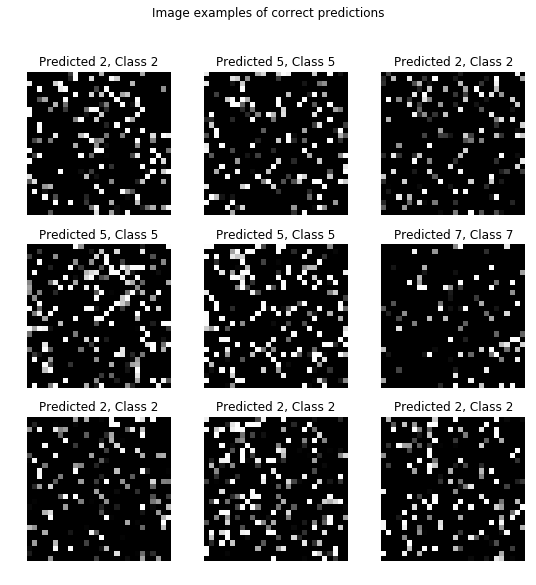

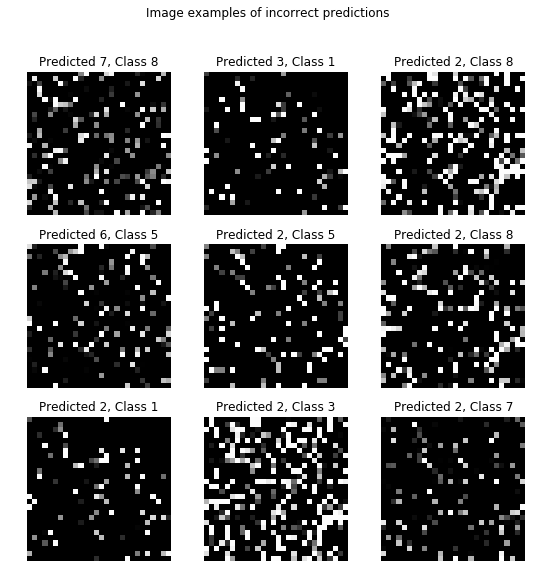

In [39]:
printResult()

# To compare both runs the mean and standard deviation of every neural net accuracy will be computed.

In [ ]:
#shuffled = pd.read_csv('shuffled.csv')
#unshuffled = pd.read_csv('unshuffled.csv')

#print('Shuffled: {} +/- {} %'.format(shuffled['Accuracy'].mean()*100, shuffled['Accuracy'].std()*100))
#print('Unshuffled: {} +/- {} %'.format(unshuffled['Accuracy'].mean()*100, unshuffled['Accuracy'].std()*100))

Running the programm 100 times for shuffled and unshuffled produced the following results:

Shuffled: 96.636 +/- 0.326 % Accuracy

Unshuffled: 96.627 +/- 0.370 % Accuracy

# Conclusion

There is no difference in the order of the input vector for quadratic pixels. The net learns the underlying structure by itself.